# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

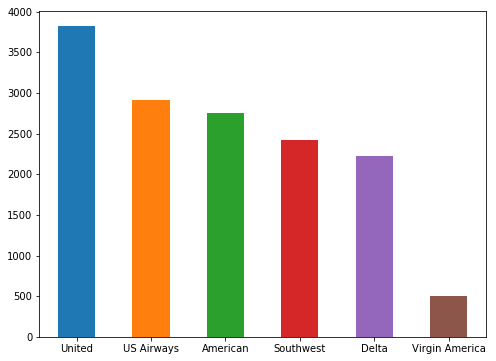

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

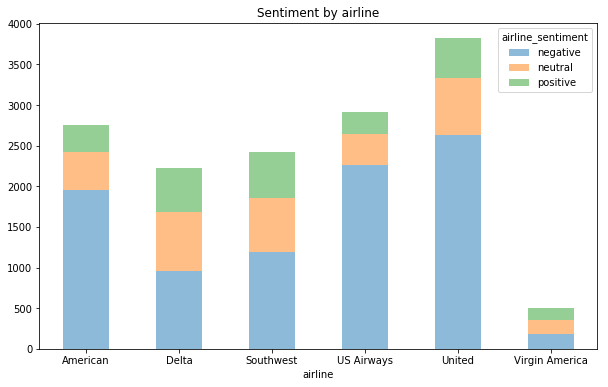

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
vect = CountVectorizer() #recibe 
X_dtm = vect.fit_transform(X)

In [10]:
temp=X_dtm.todense()

In [11]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [12]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X).toarray()
X_dtm.shape

(14640, 17964)

In [13]:
X_dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
print(vect.get_feature_names()[-150:-100])

['writing', 'written', 'wrong', 'wrongfully', 'wrongiswrong', 'wrote', 'ws', 'wtf', 'wtfodds', 'wth', 'wtop', 'wudda', 'wut', 'wway', 'x2', 'x5ZQssJtRB', 'x6SYW3MDVu', 'xAIzW2isml', 'xAToxBnsFa', 'xC6jQ70r7B', 'xCVQXYkg49', 'xD', 'xDjzkC34GB', 'xGPaAyFDwt', 'xGfS6tJTMo', 'xMAQcucWZl', 'xRdTOV7nl8', 'xX2M2jxQep', 'xZY7pHKFGR', 'xbQqqbRgVF', 'xeDeckGMW5', 'xhlc30MTfF', 'xiJiFYmvqP', 'xld', 'xmRvR4lGEg', 'xmas', 'xox', 'xtra', 'xx', 'xxppZo88j1', 'xxx', 'y3SAHVX3Zk', 'y5qE9HcQzT', 'yBv0xaowKv', 'yC7V2s0iOd', 'yI4wGUk5tr', 'yMMH9k4CBr', 'yPo7nYpRZl', 'yZH4ZRQM0i', 'yZXfe7au22']


In [15]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X) #funcion y transformacion de la variable
    print('Features: ', X_dtm.shape[1])
    clf = RandomForestClassifier()
    clf.fit(X_dtm, y) 
    print(pd.Series(cross_val_score(clf, X_dtm, y, cv=10)).describe())

In [17]:
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  117630


C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


count    10.000000
mean      0.712292
std       0.023960
min       0.654372
25%       0.707211
50%       0.716189
75%       0.722867
max       0.746585
dtype: float64


# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [18]:
vect1 = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  117630


C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


count    10.000000
mean      0.710106
std       0.022675
min       0.657787
25%       0.701403
50%       0.714676
75%       0.720116
max       0.743852
dtype: float64


In [19]:
print(vect.get_stop_words())

None


In [20]:
def tokenize_test(vect):
    X_dtm1 = vect1.fit_transform(X) #funcion y transformacion de la variable
    print('Features: ', X_dtm1.shape[1])
    clf = RandomForestClassifier()
    clf.fit(X_dtm1, y) 
    print(pd.Series(cross_val_score(clf, X_dtm1, y, cv=10)).describe())

In [21]:
vect2 = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  14770


C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


count    10.000000
mean      0.696447
std       0.039512
min       0.618169
25%       0.687831
50%       0.698190
75%       0.704797
max       0.771175
dtype: float64


# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [24]:
vect3 = CountVectorizer(ngram_range=(1, 4))
X_dtm3 = vect3.fit_transform(X)
X_dtm3.shape

(14640, 483199)

In [25]:
print(vect.get_feature_names()[-1000:-950])

['your tag line', 'your tag line fly', 'your team', 'your team about', 'your team about the', 'your team btw', 'your team btw notevenjv', 'your team couldn', 'your team couldn share', 'your team created', 'your team created your', 'your team failed', 'your team failed to', 'your team family', 'your team family emerg', 'your team for', 'your team for being', 'your team for dealing', 'your team from', 'your team from 1f', 'your team from the', 'your team has', 'your team has lost', 'your team help', 'your team help us', 'your team here', 'your team here working', 'your team let', 'your team let make', 'your team member', 'your team member at', 'your team needs', 'your team needs to', 'your team rebooked', 'your team rebooked my', 'your team so', 'your team so beautifully', 'your team thanks', 'your team thanks lot', 'your team told', 'your team told 120', 'your team was', 'your team was just', 'your team with', 'your team with challenging', 'your teams', 'your teams lack', 'your teams la

In [28]:
def tokenize_test(vect):
    X_dtm3 = vect3.fit_transform(X) #funcion y transformacion de la variable
    print('Features: ', X_dtm3.shape[1])
    clf3 = RandomForestClassifier()
    clf3.fit(X_dtm3, y) 
    print(pd.Series(cross_val_score(clf3, X_dtm3, y, cv=10)).describe())

In [29]:
vect4 = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  483199


C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


count    10.000000
mean      0.711271
std       0.019231
min       0.665984
25%       0.706134
50%       0.713363
75%       0.722648
max       0.735656
dtype: float64


# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
simple_train = ['your tag line', 'your tag line fly', 'your team about']

In [34]:
vect5 = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,about,fly,line,line fly,tag,tag line,tag line fly,team,team about,your,your tag,your tag line,your tag line fly,your team,your team about
0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0
1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0
2,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1


In [38]:
vect5 = CountVectorizer(binary=True)
df_ = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df_.reshape(1, 15), columns=vect.get_feature_names())

,about,fly,line,line fly,tag,tag line,tag line fly,team,team about,your,your tag,your tag line,your tag line fly,your team,your team about
0,1,1,2,1,2,2,1,1,1,3,2,2,1,1,1


In [39]:
tf/df_

,about,fly,line,line fly,tag,tag line,tag line fly,team,team about,your,your tag,your tag line,your tag line fly,your team,your team about
0,0.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.0,0.333333,0.5,0.5,0.0,0.0,0.0
1,0.0,1.0,0.5,1.0,0.5,0.5,1.0,0.0,0.0,0.333333,0.5,0.5,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,1.0,1.0


In [40]:
vect5 = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,about,fly,line,line fly,tag,tag line,tag line fly,team,team about,your,your tag,your tag line,your tag line fly,your team,your team about
0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0
1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0
2,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1


In [41]:
def tokenize_test(vect):
    X_dtm3 = vect5.fit_transform(X) #funcion y transformacion de la variable
    print('Features: ', X_dtm3.shape[1])
    clf3 = RandomForestClassifier()
    clf3.fit(X_dtm3, y) 
    print(pd.Series(cross_val_score(clf3, X_dtm3, y, cv=10)).describe())

In [42]:
vect6 = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  15051


C:\Users\MLNDGIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


count    10.000000
mean      0.702799
std       0.029645
min       0.634563
25%       0.697730
50%       0.706187
75%       0.715847
max       0.749317
dtype: float64
